In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from scipy import stats
from sklearn import metrics
import sklearn.preprocessing as preproc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [0]:
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["animation.html"] = "html5" #ou "jshtml"
sns.set_style("darkgrid")

In [0]:
parametros = { 
                #########################################
                # Usar um número de epocas de treino    # 
                #  padronizado para facilitar o ajuste  #
                #  entre a geração  dos dados de treino #
                #  e os gráficos animados               #
                #########################################
                'epocas' : 50,

                #########################################
                # Espessura é o quanto os eixos x e y   #
                #  serão maiores que os valores mínimo e#
                #  máximo dos seus respectivos datasets #
                #########################################
                'espessura' : 0.5,
                
                #########################################
                # n_pontos é o número de pontos que     #
                #  serão utilizados para dividir os     #
                #  eixos coordenados quando estiver     #
                #  sendo produzido grid (meshgrid) de   #
                #  desenho para um gráfico de contorno  #
                #########################################
                'n_pontos' : 100,
                
                #########################################
                # Precisão é o número de casas decimais #
                #  utilizado nas impressões em geral    #
                #########################################
                'precisao' : 3,

                #########################################
                # Usar um número padronizado de quadros #
                #  para as funções gráficas com animação#
                #########################################
                'quadros':50,

                #########################################
                # Utilizar a mesma seed para todos os   #
                #  estados de número aleatório ao longo #
                #  do script. A mistura de uma chamada  #
                #  np.random.seed(1234) com um          # 
                #  random_state=42 produziu diferenças  #
                #  entre os dados de treino e os valores#
                #  que foram apresentados nos gráficos  #
                #########################################
                'semente':42,

                #########################################
                # Taxa de aprendizado default para os   #
                #  modelos de machine learning          #
                #########################################
                'taxa_aprend':0.1}

In [7]:
from sklearn.datasets import load_wine
dt = load_wine()

data = pd.DataFrame(np.c_[dt['data'],dt['target']],columns=np.append(dt['feature_names'],['target']))
data


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,0.0


In [0]:
def Classifica(valor):
  if valor == 0:
    return 'Ruim'
  elif valor == 1:
    return 'Medio'
  else:
    return 'Bom'

In [9]:
data['target_s'] = data['target'].apply(Classifica)
data = data[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines','proline','target_s']]
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_s
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,Ruim
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,Ruim
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,Ruim
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,Ruim
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,Ruim
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,Ruim
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,Ruim
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,Ruim
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,Ruim
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,Ruim


In [10]:
data_s = data[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines','proline']]
scaler = StandardScaler()
scaler.fit(data_s)
data_s = pd.DataFrame(scaler.transform(data_s))
data_s = pd.concat([data_s, data['target_s']], axis =1)
data_s.columns = ['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od280/od315_of_diluted_wines','proline','target_s']
data_s = pd.DataFrame(data_s)
data_s

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_s
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,Ruim
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,Ruim
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,Ruim
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,Ruim
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,Ruim
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,Ruim
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,Ruim
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,Ruim
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,Ruim
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,Ruim


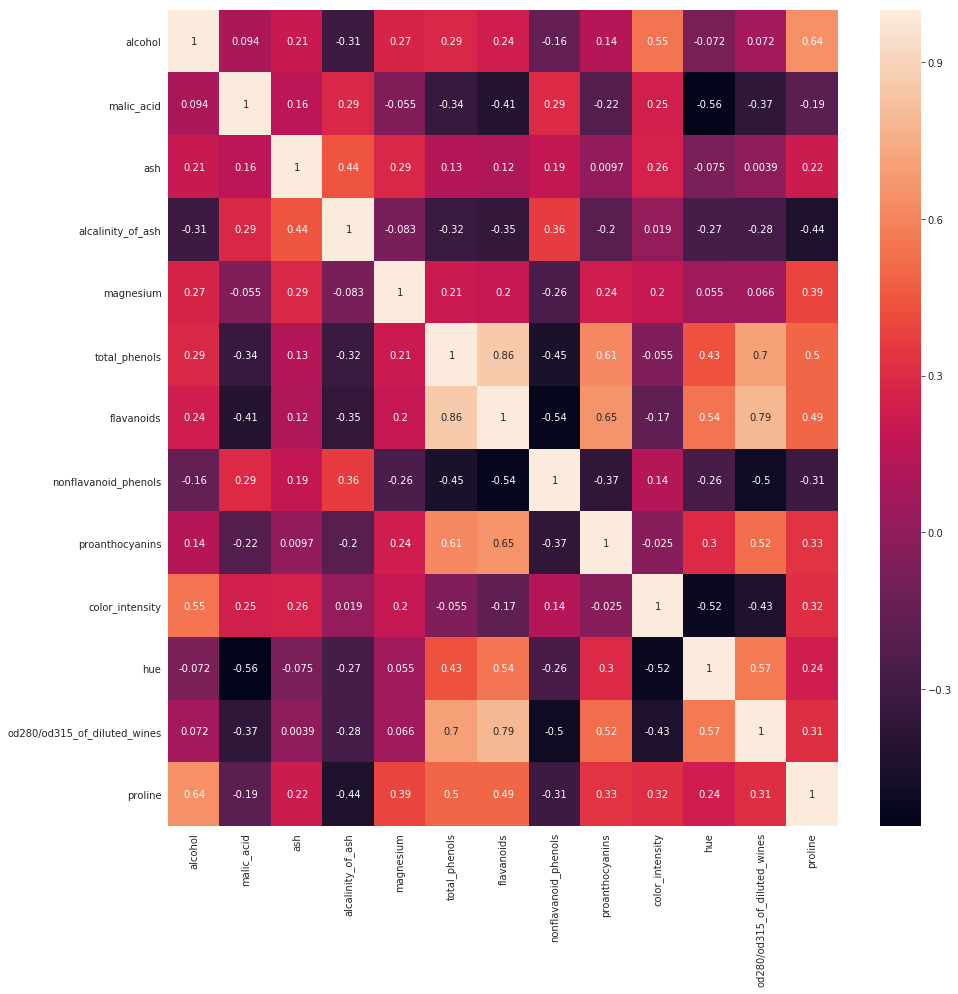

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data_s.corr(),annot=True)

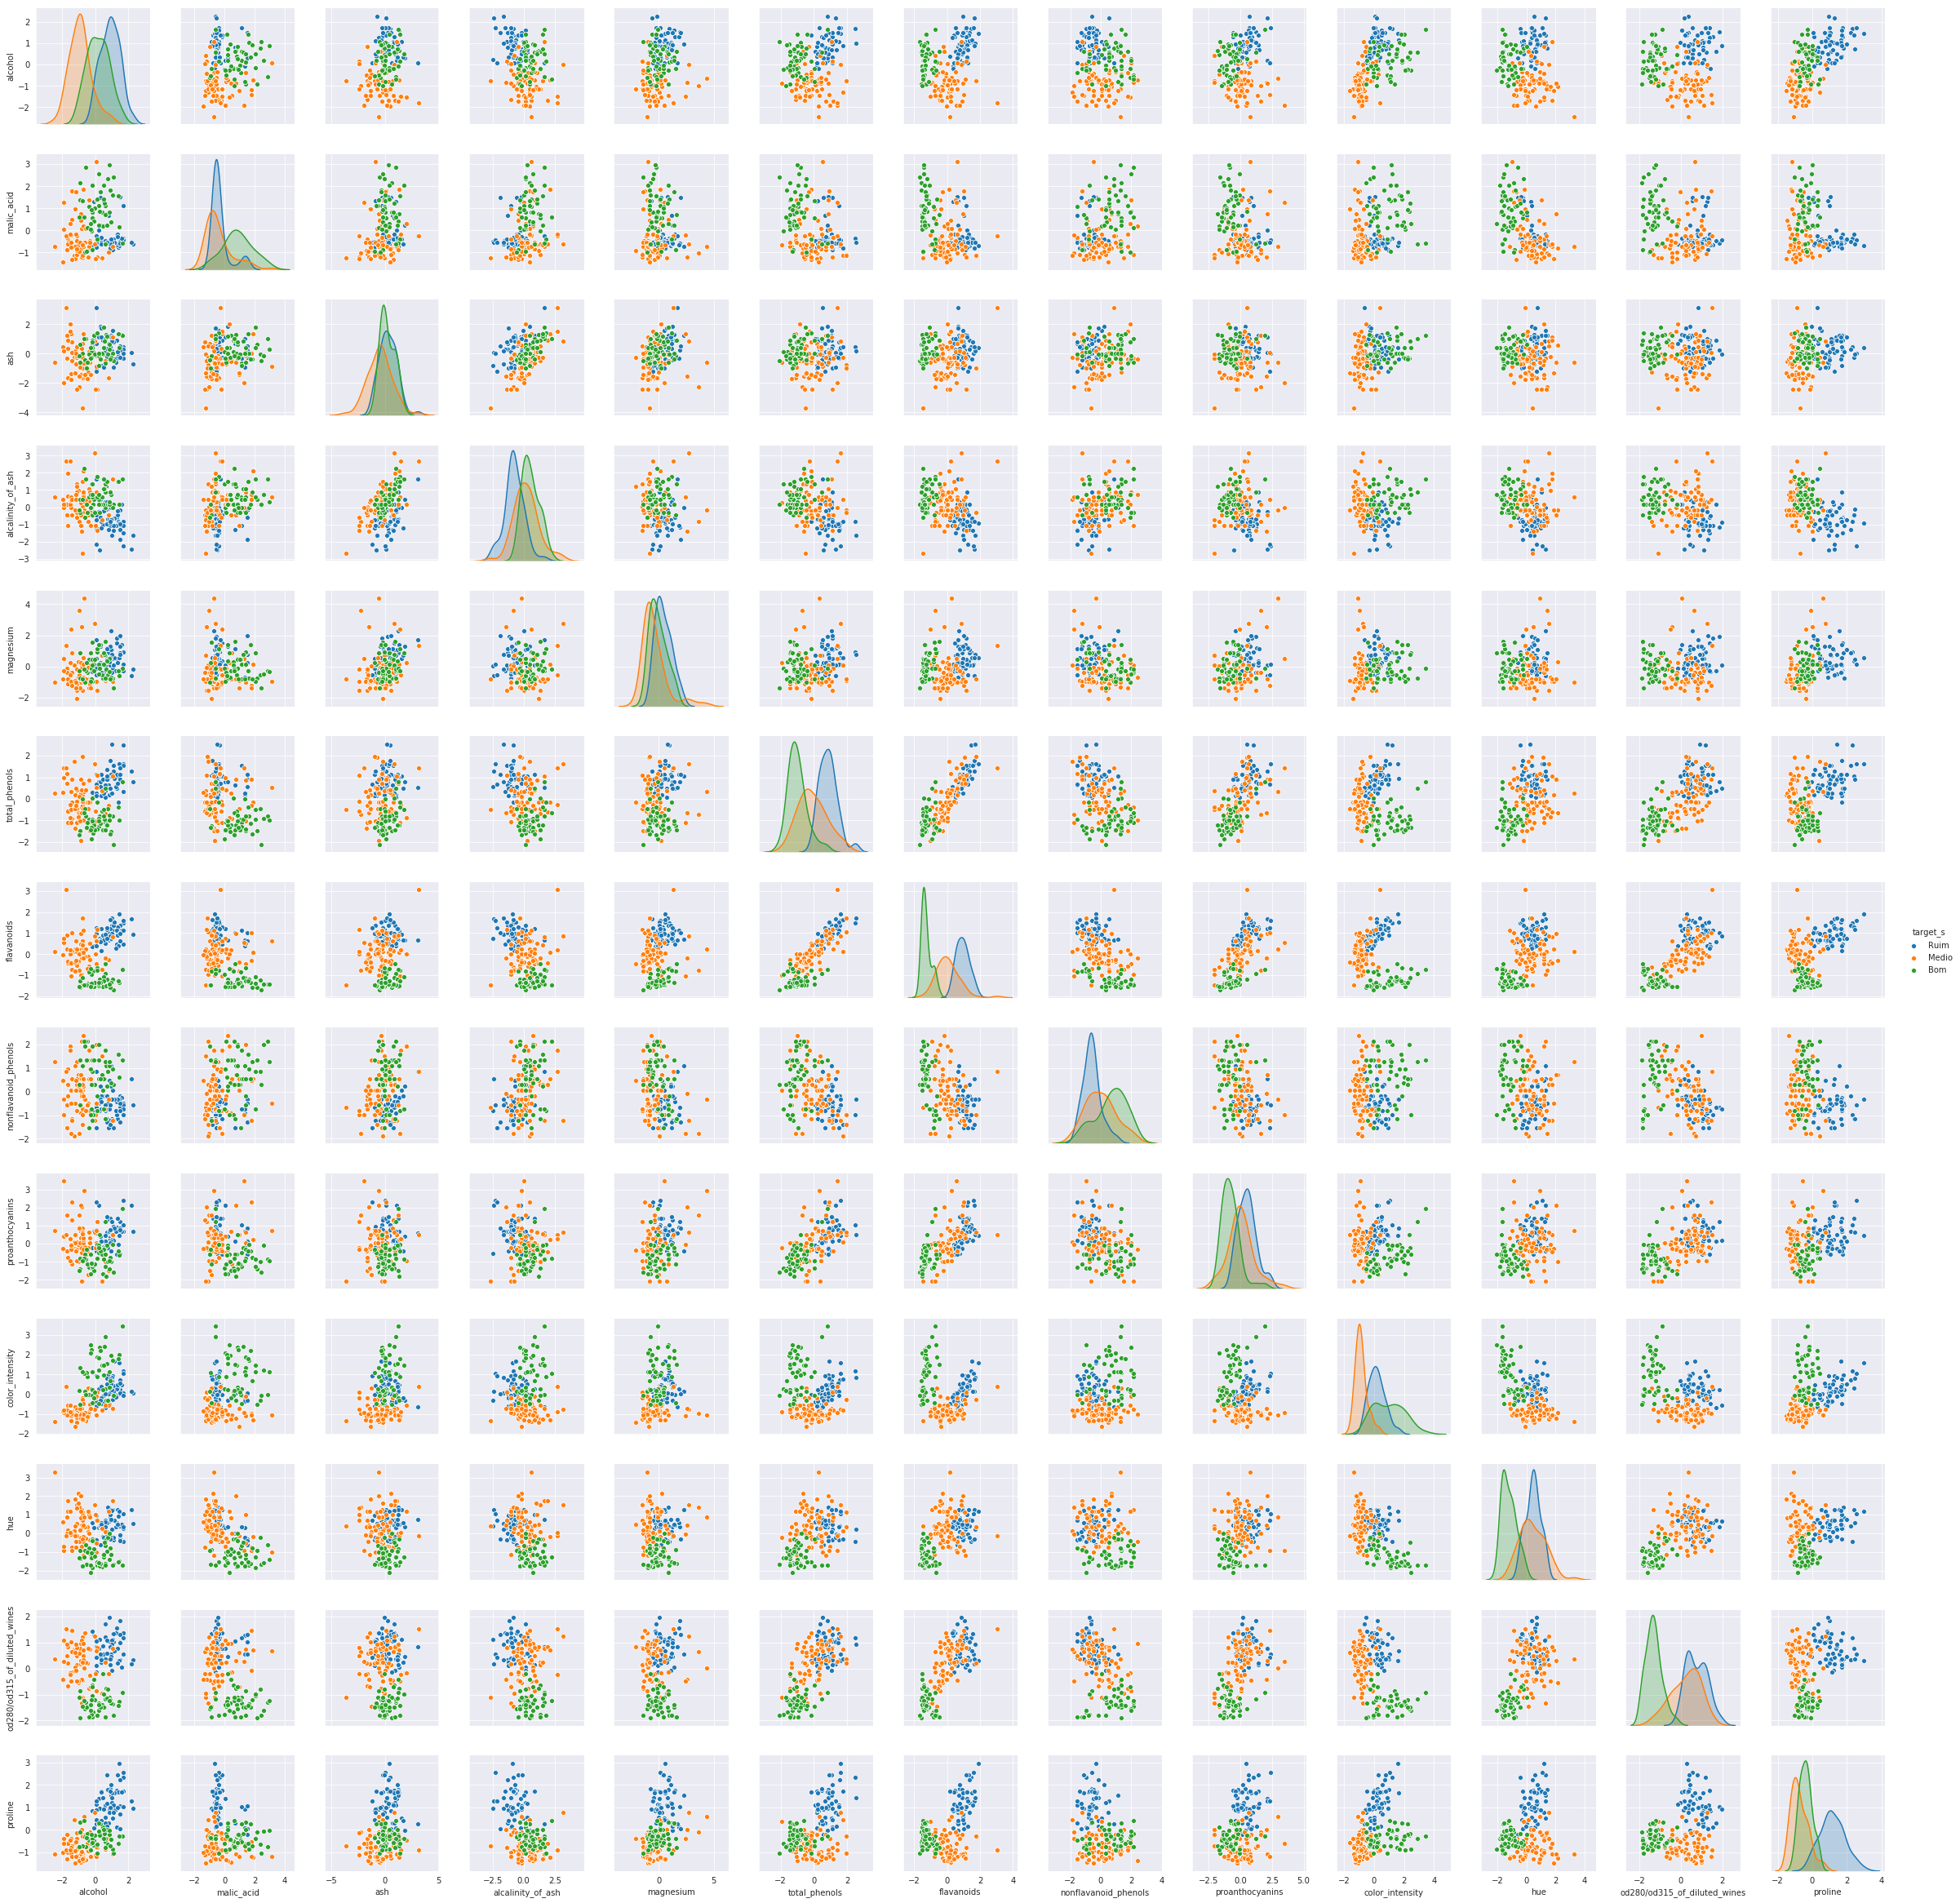

In [12]:
sns.pairplot(data_s, hue='target_s',vars=['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue','od280/od315_of_diluted_wines',	'proline'])

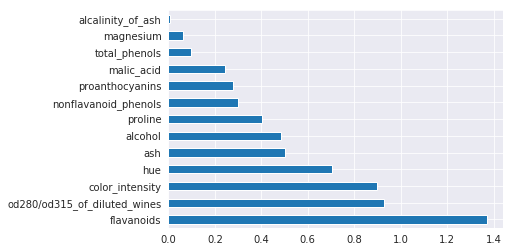

In [13]:
from sklearn import svm

X = data_s[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue','od280/od315_of_diluted_wines',	'proline']]
Y = data_s['target_s']
svm = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)
svm.fit(X, Y)

pd.Series(abs(svm.coef_[0]), index=X.columns).nlargest(20).plot(kind='barh')

In [0]:
X = data_s[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue','od280/od315_of_diluted_wines',	'proline']]
Y = data_s[['target_s']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)


In [0]:
data_model =pd.concat([X_train['od280/od315_of_diluted_wines'],X_train['flavanoids'],Y_train['target_s']],axis=1)
X_treino = data_model[['od280/od315_of_diluted_wines','flavanoids']]
Y_treino = Y_train['target_s']


In [0]:
qualidade_names_np = np.array(np.unique(data_model['target_s']))

for i in range(1000):
    qualidade_no = np.array([])

    for nome in data_model['target_s']:
        numero = np.where(qualidade_names_np == nome)[0][0]
        qualidade_no = np.append(qualidade_no, numero)

In [0]:
data_model['target_no'] = qualidade_no

In [0]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)

In [19]:
svm_linear.fit(X_treino,Y_treino)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
#########################################################
data_model['target_svml'] = svm_linear.predict(X_treino)

In [0]:
data_model['target_svml_result'] = \
    data_model['target_s'] == data_model['target_svml']

In [0]:
x_min = X_treino.iloc[:,0].min() - parametros['espessura']
x_max = X_treino.iloc[:,0].max() + parametros['espessura']
eixo_x = np.linspace(x_min, x_max, parametros['n_pontos'])

y_min = X_treino.iloc[:,1].min() - parametros['espessura']
y_max = X_treino.iloc[:,1].max() + parametros['espessura']
eixo_y = np.linspace(y_min, y_max, parametros['n_pontos'])

In [0]:
x, y = np.meshgrid(eixo_x, eixo_y)

In [24]:
X_new = np.array([x.ravel(), y.ravel()]).reshape(2,-1).T

X_new

array([[-2.39505389, -2.19597053],
       [-2.3460037 , -2.19597053],
       [-2.29695351, -2.19597053],
       ...,
       [ 2.36281461,  3.56283174],
       [ 2.4118648 ,  3.56283174],
       [ 2.46091499,  3.56283174]])

In [0]:
data_new = pd.DataFrame(data = X_new, 
                        columns = ['od280/od315_of_diluted_wines','flavanoids'])

In [0]:
data_new['target_s'] = \
     svm_linear.predict( \
               data_new[['od280/od315_of_diluted_wines','flavanoids']]) 

In [27]:
svm_linear.fit(data_model[['od280/od315_of_diluted_wines','flavanoids']],\
               data_model['target_no'])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
for i in range(10):
    data_new['target_no'] = \
             svm_linear.predict( \
                data_new[['od280/od315_of_diluted_wines','flavanoids']])

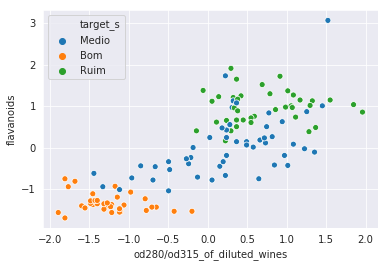

In [29]:
plt.close()
sns.scatterplot(data = data_model, x='od280/od315_of_diluted_wines',
                             y='flavanoids',
                             hue='target_s')
plt.show()

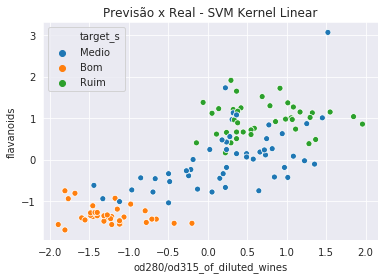

In [30]:
plt.close()

fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, x='od280/od315_of_diluted_wines',
                             y='flavanoids',
                             hue = 'target_s')
plt.show()

In [0]:
#  conveniência                                         #
#########################################################
svml_result = data_model['target_svml_result']

In [32]:
bordas = {False:'black', True:'none'}
bordas_pontos = [bordas[x] for x in svml_result]
data_model['svml_bordas'] = bordas_pontos
bordas

{False: 'black', True: 'none'}

In [0]:
largura = {False:2, True:0}
larg_pontos = [largura[x] for x in svml_result] 
data_model['svml_larg'] = larg_pontos

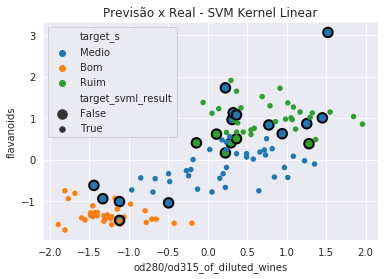

In [34]:
plt.close()
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, 
    x = 'od280/od315_of_diluted_wines', y = 'flavanoids', hue = 'target_s',
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

plt.show()

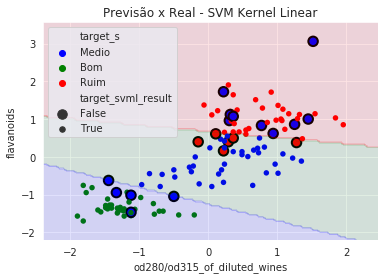

In [35]:
plt.close()

minhas_cores = ['blue','green','red']
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")

sns.scatterplot(data = data_model, 
    x = 'od280/od315_of_diluted_wines', y = 'flavanoids', hue = 'target_s',
    palette = minhas_cores, ax=ax,
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

ax.contourf(x, y, 
            np.array(data_new['target_no']).reshape(100,100),
            cmap = ListedColormap(minhas_cores), alpha = 0.1)
plt.show()

In [36]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)

svm_linear.fit(X_treino[['od280/od315_of_diluted_wines','flavanoids']],Y_treino)

Y_pred = svm_linear.predict(X_test[['od280/od315_of_diluted_wines','flavanoids']])  
Y_pred

array(['Ruim', 'Medio', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Medio', 'Bom',
       'Medio', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Medio', 'Bom', 'Medio',
       'Ruim', 'Ruim', 'Medio', 'Bom', 'Bom', 'Ruim', 'Medio', 'Medio',
       'Ruim', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Medio',
       'Bom', 'Bom', 'Ruim', 'Medio', 'Bom', 'Ruim', 'Medio', 'Medio',
       'Bom', 'Bom', 'Medio', 'Ruim', 'Bom', 'Medio', 'Medio', 'Ruim',
       'Bom', 'Ruim', 'Ruim', 'Medio', 'Ruim', 'Medio'], dtype=object)

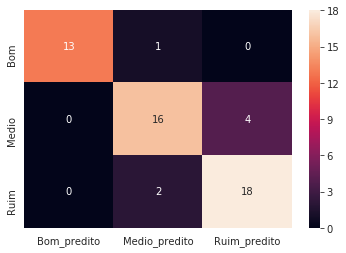

In [37]:
cm = np.array(confusion_matrix(Y_test, Y_pred))
confusio = pd.DataFrame(cm,index=['Bom','Medio','Ruim'],columns=['Bom_predito','Medio_predito','Ruim_predito'])
sns.heatmap(confusio,annot=True)

In [38]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         Bom       1.00      0.93      0.96        14
       Medio       0.84      0.80      0.82        20
        Ruim       0.82      0.90      0.86        20

    accuracy                           0.87        54
   macro avg       0.89      0.88      0.88        54
weighted avg       0.87      0.87      0.87        54



In [0]:

X_treino = X_train
Y_treino = Y_train

In [40]:
X_treino

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
99,-0.877801,0.748338,-0.572122,-0.448909,-0.824415,0.889114,0.964541,0.710264,2.135968,-1.193067,2.029366,0.308357,-1.085572
131,-0.148995,0.586759,0.122392,0.151661,0.298998,-1.594500,-0.812480,-0.981875,-1.333159,0.147900,-0.954024,-1.683187,-0.690695
159,0.592164,-0.598156,0.999674,0.902373,-0.754202,0.488531,-0.932956,1.274310,1.224884,2.894719,-1.699872,-1.174708,-0.404091
57,0.357463,-0.328857,1.145888,-0.809251,0.158572,1.129464,1.205493,-0.417829,0.121071,0.407442,0.493797,0.322481,1.665830
71,1.061565,-0.741782,1.109334,1.653086,-0.964842,1.049347,0.834026,-1.223610,0.489009,-0.725891,1.766126,0.774463,-1.072834
170,-0.988975,0.622666,-0.170035,-0.148624,-0.262708,-1.674617,-1.545376,0.307374,-1.508367,0.191157,-1.305011,-1.104086,-0.754385
118,-0.284874,0.981731,-1.412851,-1.049479,-1.386122,-1.065731,-0.782361,0.549108,-1.333159,-0.717240,-1.129518,-0.694478,-1.193845
141,0.443932,0.200764,-0.060375,0.151661,-0.754202,-1.434267,-1.535336,0.065639,-1.666055,0.234414,-1.129518,-0.200123,0.105428
147,-0.161348,2.040973,0.414820,0.602088,-0.964842,-0.953567,-1.384741,0.871420,-1.280596,1.121183,-1.831492,-1.061713,-0.388168
11,1.382733,-0.768712,-0.170035,-0.809251,-0.332922,-0.152402,0.402320,-0.820719,-0.036617,-0.025128,0.932531,0.294232,1.697675


In [0]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)

In [42]:
svm_linear.fit(X_treino,Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
Y_pred = svm_linear.predict(X_test)  
Y_pred

array(['Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Medio', 'Bom',
       'Medio', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Bom', 'Bom', 'Medio',
       'Ruim', 'Ruim', 'Ruim', 'Bom', 'Medio', 'Ruim', 'Medio', 'Medio',
       'Ruim', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Medio',
       'Bom', 'Bom', 'Ruim', 'Medio', 'Bom', 'Medio', 'Medio', 'Medio',
       'Bom', 'Bom', 'Medio', 'Ruim', 'Bom', 'Medio', 'Medio', 'Ruim',
       'Bom', 'Medio', 'Medio', 'Medio', 'Medio', 'Medio'], dtype=object)

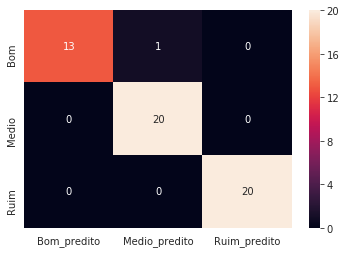

In [44]:
cm = np.array(confusion_matrix(Y_test, Y_pred))
confusio = pd.DataFrame(cm,index=['Bom','Medio','Ruim'],columns=['Bom_predito','Medio_predito','Ruim_predito'])
sns.heatmap(confusio,annot=True)

In [45]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         Bom       1.00      0.93      0.96        14
       Medio       0.95      1.00      0.98        20
        Ruim       1.00      1.00      1.00        20

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [0]:
pca = PCA(n_components=2)

In [47]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_s
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0,Ruim
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0,Ruim
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0,Ruim
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0,Ruim
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0,Ruim
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0,Ruim
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0,Ruim
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0,Ruim
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0,Ruim
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0,Ruim


In [48]:
X = data[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue','od280/od315_of_diluted_wines',	'proline']]
Y = data[['target_s']]

pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [49]:
X  = pca.transform(X)
X

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [0]:
data_pca = pd.DataFrame(X)

In [51]:
scaler = StandardScaler()
scaler.fit(data_pca)
data_pca = pd.DataFrame(scaler.transform(data_pca))
data_s = pd.concat([data_pca, Y['target_s']], axis =1)
data_s.columns =  ['componente_1', 'componente_2', 'target_s']
data_s


,componente_1,componente_2,target_s
0,1.014282,1.640831,Ruim
1,0.965041,-0.409573,Ruim
2,1.394756,-0.499095,Ruim
3,2.334586,0.014714,Ruim
4,-0.036843,1.411631,Ruim
5,2.239039,-0.025359,Ruim
6,1.728784,-1.032115,Ruim
7,1.746074,0.874115,Ruim
8,0.948929,-0.624520,Ruim
9,0.948969,-0.542172,Ruim


In [0]:
X = data_s[['componente_1', 'componente_2']]
Y = data_s[['target_s']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [0]:
data_model =pd.concat([X_train['componente_1'],X_train['componente_2'],Y_train['target_s']],axis=1)
X_treino = data_model[['componente_1','componente_2']]
Y_treino = Y_train['target_s']


In [0]:
qualidade_names_np = np.array(np.unique(data_model['target_s']))

for i in range(1000):
    qualidade_no = np.array([])

    for nome in data_model['target_s']:
        numero = np.where(qualidade_names_np == nome)[0][0]
        qualidade_no = np.append(qualidade_no, numero)

In [0]:
data_model['target_no'] = qualidade_no

In [0]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='poly',
                    random_state=parametros['semente'],
                    C = 1)

In [57]:
svm_linear.fit(X_treino,Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
data_model['target_svml'] = svm_linear.predict(X_treino)

In [0]:
data_model['target_svml_result'] = \
    data_model['target_s'] == data_model['target_svml']

In [0]:
x_min = X_treino.iloc[:,0].min() - parametros['espessura']
x_max = X_treino.iloc[:,0].max() + parametros['espessura']
eixo_x = np.linspace(x_min, x_max, parametros['n_pontos'])

y_min = X_treino.iloc[:,1].min() - parametros['espessura']
y_max = X_treino.iloc[:,1].max() + parametros['espessura']
eixo_y = np.linspace(y_min, y_max, parametros['n_pontos'])

In [0]:
x, y = np.meshgrid(eixo_x, eixo_y)

In [62]:
X_new = np.array([x.ravel(), y.ravel()]).reshape(2,-1).T

X_new

array([[-1.99345249, -1.99474235],
       [-1.93825616, -1.99474235],
       [-1.88305983, -1.99474235],
       ...,
       [ 3.36059167,  4.98864936],
       [ 3.41578801,  4.98864936],
       [ 3.47098434,  4.98864936]])

In [0]:
data_new = pd.DataFrame(data = X_new, 
                        columns = ['componente_1','componente_2'])

In [0]:
data_new['target_s'] = \
     svm_linear.predict( \
               data_new[['componente_1','componente_2']]) 

In [65]:
svm_linear.fit(data_model[['componente_1','componente_2']],\
               data_model['target_no'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
for i in range(10):
    data_new['target_no'] = \
             svm_linear.predict( \
                data_new[['componente_1','componente_2']])

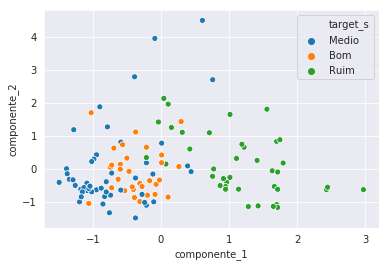

In [67]:
plt.close()
sns.scatterplot(data = data_model, x='componente_1',
                             y='componente_2',
                             hue='target_s')
plt.show()

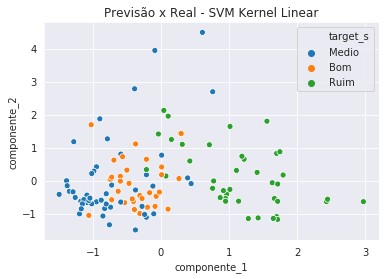

In [68]:
plt.close()

fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, x='componente_1',
                             y='componente_2',
                             hue = 'target_s')
plt.show()

In [0]:
#  conveniência                                         #
2
#########################################################
3
svml_result = data_model['target_svml_result']

In [70]:
bordas = {False:'black', True:'none'}
bordas_pontos = [bordas[x] for x in svml_result]
data_model['svml_bordas'] = bordas_pontos
bordas

{False: 'black', True: 'none'}

In [0]:
largura = {False:2, True:0}
larg_pontos = [largura[x] for x in svml_result] 
data_model['svml_larg'] = larg_pontos

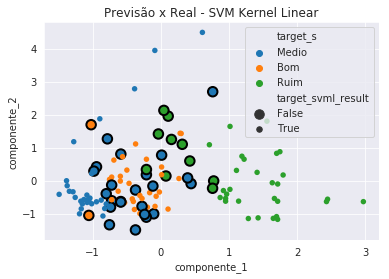

In [72]:
plt.close()
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, 
    x = 'componente_1', y = 'componente_2', hue = 'target_s',
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

plt.show()

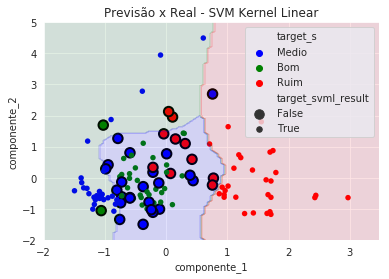

In [73]:
plt.close()

minhas_cores = ['blue','green','red']
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")

sns.scatterplot(data = data_model, 
    x = 'componente_1', y = 'componente_2', hue = 'target_s',
    palette = minhas_cores, ax=ax,
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

ax.contourf(x, y, 
            np.array(data_new['target_no']).reshape(100,100),
            cmap = ListedColormap(minhas_cores), alpha = 0.1)
plt.show()

In [74]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)

svm_linear.fit(X_treino[['componente_1','componente_2']],Y_treino)

Y_pred = svm_linear.predict(X_test[['componente_1','componente_2']])  
Y_pred

array(['Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Medio',
       'Medio', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Bom', 'Medio', 'Medio',
       'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Medio', 'Ruim', 'Medio', 'Medio',
       'Ruim', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Bom', 'Medio', 'Medio',
       'Medio', 'Bom', 'Ruim', 'Medio', 'Medio', 'Bom', 'Bom', 'Medio',
       'Medio', 'Ruim', 'Medio', 'Ruim', 'Bom', 'Medio', 'Bom', 'Ruim',
       'Medio', 'Medio', 'Medio', 'Medio', 'Bom', 'Medio'], dtype=object)

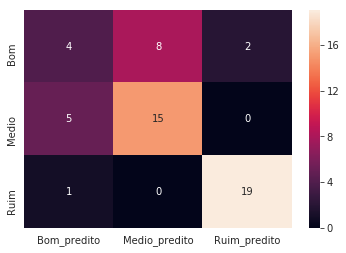

In [75]:
cm = np.array(confusion_matrix(Y_test, Y_pred))
confusio = pd.DataFrame(cm,index=['Bom','Medio','Ruim'],columns=['Bom_predito','Medio_predito','Ruim_predito'])
sns.heatmap(confusio,annot=True)

In [76]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         Bom       0.40      0.29      0.33        14
       Medio       0.65      0.75      0.70        20
        Ruim       0.90      0.95      0.93        20

    accuracy                           0.70        54
   macro avg       0.65      0.66      0.65        54
weighted avg       0.68      0.70      0.69        54



In [0]:
pca = PCA(n_components=4)

In [78]:
X = data[['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols','nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue','od280/od315_of_diluted_wines',	'proline']]
Y = data[['target_s']]

pca.fit(X) 

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
X = pca.transform(X)
X

array([[ 3.18561755e+02,  2.14921591e+01,  3.09627551e+00,
        -2.74527569e-01],
       [ 3.03096647e+02, -5.36470311e+00,  6.83855397e+00,
        -7.17075187e-01],
       [ 4.38059773e+02, -6.53728236e+00, -1.17561755e+00,
         7.93586335e-01],
       [ 7.33238751e+02,  1.92744864e-01, -9.43289908e-01,
        -6.49639509e-01],
       [-1.15724783e+01,  1.84900300e+01, -6.33887653e-01,
         1.23926494e+00],
       [ 7.03229923e+02, -3.32145235e-01,  9.36051834e-01,
        -3.83227087e-01],
       [ 5.42971479e+02, -1.35189849e+01,  2.16369498e+00,
         1.81594352e-01],
       [ 5.48401780e+02,  1.14494130e+01,  5.55435727e-02,
         1.44682974e+00],
       [ 2.98035739e+02, -8.18013208e+00,  3.86533773e+00,
        -9.02162066e-01],
       [ 2.98048163e+02, -7.10150897e+00,  1.52706380e+00,
        -1.79622982e+00],
       [ 7.63078626e+02, -8.33431254e+00, -1.92230141e+00,
         1.55444191e+00],
       [ 5.32943254e+02, -1.42876562e+01,  1.57833385e-01,
      

In [80]:
pca.explained_variance_

array([9.92015458e+04, 1.72535266e+02, 9.37533518e+00, 4.86455441e+00])

In [81]:
pca.explained_variance_ratio_

array([9.98098798e-01, 1.73593305e-03, 9.43282757e-05, 4.89438533e-05])

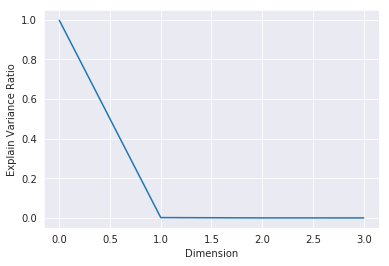

In [82]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [0]:
data_pca = pd.DataFrame(X)
data_pca.columns = ['componente_1','componente_2','componente_3','componente_4']


In [84]:
data_s = pd.concat([data_pca['componente_1'],data['flavanoids'], Y['target_s']], axis =1)
data_s


,componente_1,flavanoids,target_s
0,318.561755,3.06,Ruim
1,303.096647,2.76,Ruim
2,438.059773,3.24,Ruim
3,733.238751,3.49,Ruim
4,-11.572478,2.69,Ruim
5,703.229923,3.39,Ruim
6,542.971479,2.52,Ruim
7,548.401780,2.51,Ruim
8,298.035739,2.98,Ruim
9,298.048163,3.15,Ruim


In [0]:
scaler = StandardScaler()
data_s = data_s[['componente_1','flavanoids']]
scaler.fit(data_s)
data_s = pd.DataFrame(scaler.transform(data_s))
data_s = pd.concat([data_s, Y['target_s']], axis =1)
data_s.columns =  ['componente_1', 'flavanoids', 'target_s']
data_s

,componente_1,flavanoids,target_s
0,1.014280,1.034819,Ruim
1,0.965040,0.733629,Ruim
2,1.394754,1.215533,Ruim
3,2.334584,1.466525,Ruim
4,-0.036846,0.663351,Ruim
5,2.239038,1.366128,Ruim
6,1.728786,0.492677,Ruim
7,1.746075,0.482637,Ruim
8,0.948926,0.954502,Ruim
9,0.948966,1.125176,Ruim


In [0]:
X = data_s[['componente_1', 'flavanoids']]
Y = data_s[['target_s']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=2)

In [0]:
data_model =pd.concat([X_train['componente_1'],X_train['flavanoids'],Y_train['target_s']],axis=1)
X_treino = data_model[['componente_1','flavanoids']]
Y_treino = Y_train['target_s']


In [0]:
qualidade_names_np = np.array(np.unique(data_model['target_s']))

for i in range(1000):
    qualidade_no = np.array([])

    for nome in data_model['target_s']:
        numero = np.where(qualidade_names_np == nome)[0][0]
        qualidade_no = np.append(qualidade_no, numero)

In [0]:
data_model['target_no'] = qualidade_no

In [0]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='poly',
                    random_state=parametros['semente'],
                    C = 1)

In [0]:
svm_linear.fit(X_treino,Y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
data_model['target_svml'] = svm_linear.predict(X_treino)

In [0]:
data_model['target_svml_result'] = \
    data_model['target_s'] == data_model['target_svml']

In [0]:
x_min = X_treino.iloc[:,0].min() - parametros['espessura']
x_max = X_treino.iloc[:,0].max() + parametros['espessura']
eixo_x = np.linspace(x_min, x_max, parametros['n_pontos'])

y_min = X_treino.iloc[:,1].min() - parametros['espessura']
y_max = X_treino.iloc[:,1].max() + parametros['espessura']
eixo_y = np.linspace(y_min, y_max, parametros['n_pontos'])

In [0]:
x, y = np.meshgrid(eixo_x, eixo_y)

In [0]:
X_new = np.array([x.ravel(), y.ravel()]).reshape(2,-1).T

X_new

array([[-1.99345731, -2.19597053],
       [-1.93826096, -2.19597053],
       [-1.8830646 , -2.19597053],
       ...,
       [ 3.36058943,  3.56283174],
       [ 3.41578579,  3.56283174],
       [ 3.47098215,  3.56283174]])

In [0]:
data_new = pd.DataFrame(data = X_new, 
                        columns = ['componente_1','flavanoids'])

In [0]:
data_new['target_s'] = \
     svm_linear.predict( \
               data_new[['componente_1','flavanoids']]) 

In [0]:
svm_linear.fit(data_model[['componente_1','flavanoids']],\
               data_model['target_no'])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
for i in range(10):
    data_new['target_no'] = \
             svm_linear.predict( \
                data_new[['componente_1','flavanoids']])

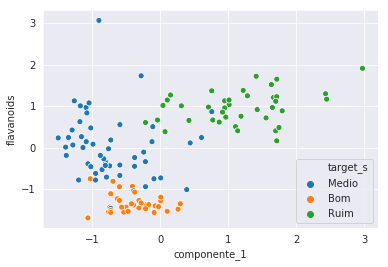

In [0]:
plt.close()
sns.scatterplot(data = data_model, x='componente_1',
                             y='flavanoids',
                             hue='target_s')
plt.show()

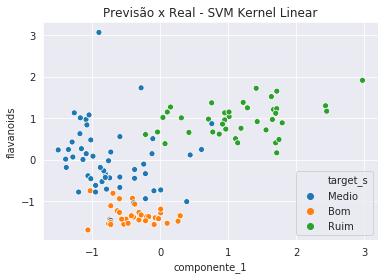

In [0]:
plt.close()

fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, x='componente_1',
                             y='flavanoids',
                             hue = 'target_s')
plt.show()

In [0]:
svml_result = data_model['target_svml_result']

In [0]:
bordas = {False:'black', True:'none'}
bordas_pontos = [bordas[x] for x in svml_result]
data_model['svml_bordas'] = bordas_pontos
bordas

{False: 'black', True: 'none'}

In [0]:
largura = {False:2, True:0}
larg_pontos = [largura[x] for x in svml_result] 
data_model['svml_larg'] = larg_pontos

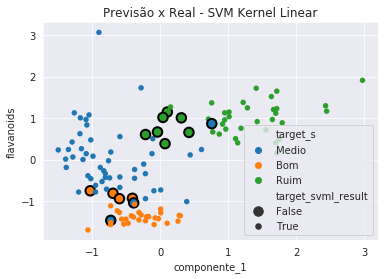

In [0]:
plt.close()
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")
sns.scatterplot(data = data_model, 
    x = 'componente_1', y = 'flavanoids', hue = 'target_s',
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

plt.show()

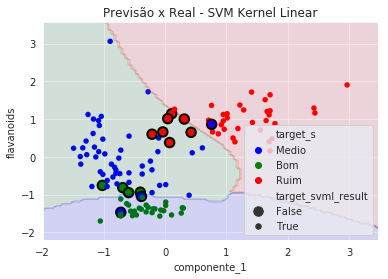

In [0]:
plt.close()

minhas_cores = ['blue','green','red']
fig, ax = plt.subplots()
ax.set_title("Previsão x Real - SVM Kernel Linear")

sns.scatterplot(data = data_model, 
    x = 'componente_1', y = 'flavanoids', hue = 'target_s',
    palette = minhas_cores, ax=ax,
    size='target_svml_result', sizes=[90,30],
    linewidth=data_model['svml_larg'], edgecolor=data_model['svml_bordas'])

ax.contourf(x, y, 
            np.array(data_new['target_no']).reshape(100,100),
            cmap = ListedColormap(minhas_cores), alpha = 0.1)
plt.show()

In [0]:
from sklearn import svm
svm_linear = svm.SVC(\
                    kernel='linear',
                    random_state=parametros['semente'],
                    C = 1)

svm_linear.fit(X_treino[['componente_1','flavanoids']],Y_treino)

Y_pred = svm_linear.predict(X_test[['componente_1','flavanoids']])  
Y_pred

array(['Ruim', 'Ruim', 'Bom', 'Ruim', 'Ruim', 'Ruim', 'Medio', 'Bom',
       'Medio', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Medio', 'Medio',
       'Medio', 'Ruim', 'Ruim', 'Ruim', 'Bom', 'Medio', 'Ruim', 'Medio',
       'Medio', 'Ruim', 'Ruim', 'Medio', 'Ruim', 'Ruim', 'Ruim', 'Medio',
       'Medio', 'Medio', 'Bom', 'Ruim', 'Medio', 'Bom', 'Medio', 'Medio',
       'Medio', 'Bom', 'Bom', 'Medio', 'Ruim', 'Bom', 'Medio', 'Medio',
       'Ruim', 'Medio', 'Medio', 'Medio', 'Medio', 'Medio', 'Medio'],
      dtype=object)

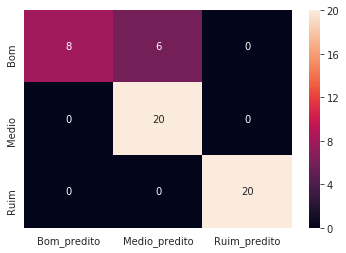

In [0]:
cm = np.array(confusion_matrix(Y_test, Y_pred))
confusio = pd.DataFrame(cm,index=['Bom','Medio','Ruim'],columns=['Bom_predito','Medio_predito','Ruim_predito'])
sns.heatmap(confusio,annot=True)

In [0]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         Bom       1.00      0.57      0.73        14
       Medio       0.77      1.00      0.87        20
        Ruim       1.00      1.00      1.00        20

    accuracy                           0.89        54
   macro avg       0.92      0.86      0.87        54
weighted avg       0.91      0.89      0.88        54

